# Pressure Traverse- Revised Beggs and Brill Correlation

Importing psapy

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import psapy.FluidProps
import psapy.BeggsandBrill as BB

In [3]:
import psapy.WoldesemayatandGhajar as WG

Input Data

In [4]:
oil_rate= 100
water_rate = 50
gor = 300
gas_grav = 0.65
oil_grav = 35
wtr_grav = 1.07
diameter=2.441
angle=90.0
thp= 150.0
tht=100.0
twf=150.0
depth = 5000
sample_size =51

def temp_gradient(t0,t1, depth):
    if depth==0:
        return 0
    else:
        return abs(t0-t1)/depth    

t_grad = temp_gradient(tht,twf, depth)
t_grad

0.01

In [5]:
depths = np.linspace(0, depth, sample_size)

In [6]:
temps = tht + t_grad * depths

In [13]:
#def Pgrad(P, T, oil_rate, wtr_rate, Gor, gas_grav, oil_grav, wtr_grav, d, angle):


def pressure_traverse_bb(oil_rate):
    p=[]
    dpdz=[]
    dpdz_Wg = []
    for i in range(len(depths)):

        if i==0:
            p.append(thp)
        else:
            dz = (depths[i]-depths[i-1])
            pressure = p[i-1]+dz*dpdz[i-1]
            p.append(pressure)

        dpdz_step = BB.Pgrad(p[i], temps[i], oil_rate, water_rate, gor, gas_grav, oil_grav, wtr_grav, diameter, angle) 
        dpdz.append(dpdz_step)
        
    return p, dpdz
def pressure_traverse_WG(oil_rate):
    p=[]
    dpdz=[]
    for i in range(len(depths)):

        if i==0:
            p.append(thp)
        else:
            dz = (depths[i]-depths[i-1])
            pressure = p[i-1]+dz*dpdz[i-1]
            p.append(pressure)

        dpdz_step_WG = WG.Pgrad(p[i], temps[i], oil_rate, water_rate, gor, gas_grav, oil_grav, wtr_grav, diameter, angle)
        dpdz.append(dpdz_step_WG)
        
    return p, dpdz
p_bb, dpdz = pressure_traverse_bb(oil_rate)
p_wg, dpdz = pressure_traverse_WG(oil_rate)


UnboundLocalError: local variable 'regime' referenced before assignment

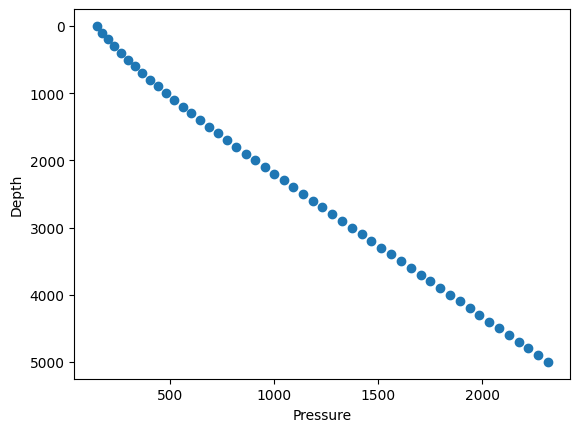

In [10]:
scatter =plt.scatter(p, depths)
ax = scatter.axes
ax.invert_yaxis()
plt.xlabel('Pressure')
plt.ylabel('Depth')
plt.show()

In [28]:
oil_rates=[100,200,300] 

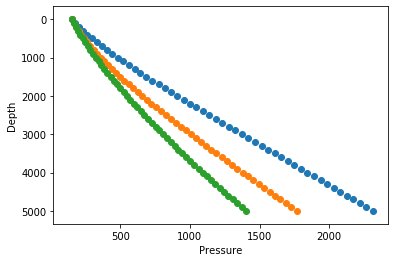

In [39]:
for r in oil_rates:
    p, dpdz =pressure_traverse(r)
    scatter =plt.scatter(p, depths)
ax = scatter.axes
ax.invert_yaxis()
plt.xlabel('Pressure')
plt.ylabel('Depth')
plt.show()

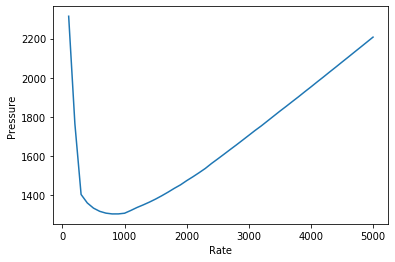

In [53]:
def vlp(rates):
    bhps =[]
    for q in rates:
        p, dpdz = pressure_traverse(q)
        bhp = p[-1]
        bhps.append(bhp)
    return bhps

rates = np.linspace(100, 5000, 50)
bhps = vlp(rates)
plt.plot(rates, bhps, '-')
plt.xlabel('Rate')
plt.ylabel('Pressure')
plt.show()